In [ ]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img=cv2.imread('/content/drive/MyDrive/image_optimzation.jpg')

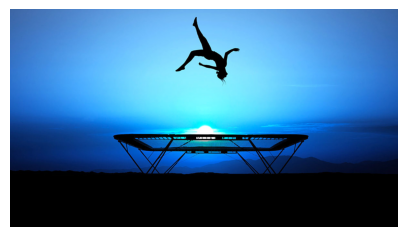

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(img,'gray')
plt.axis('off')
plt.show()

In [ ]:
#Generate random gaussian noise
mean=0
stdev=100
noise=np.zeros(img.shape,np.uint8)
cv2.randn(noise,mean,stdev)
#add noise to the image
noisy_img=cv2.add(img,noise)

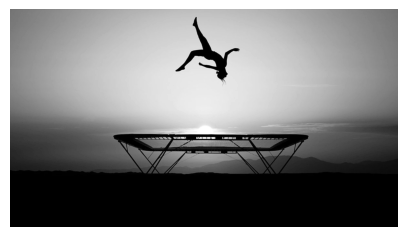

In [ ]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(gray_img,'gray')
plt.axis('off')
plt.show()

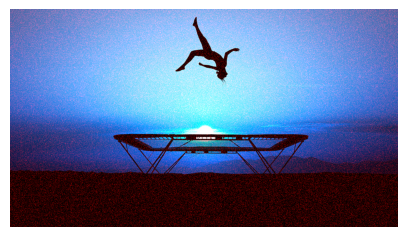

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(noisy_img,'gray')
plt.axis('off')
plt.show()

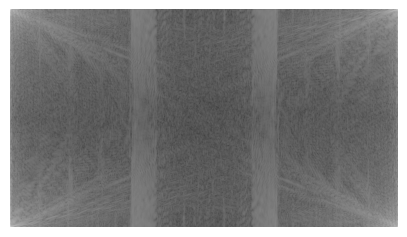

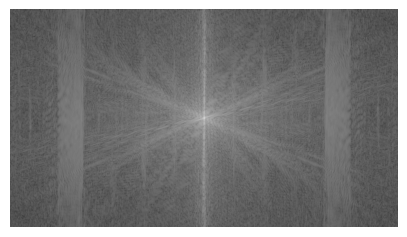

In [ ]:
F=np.fft.fft2(gray_img)
Fshift=np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log10(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()




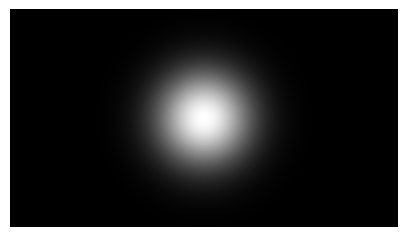

In [ ]:
#create gausssian filter;low pass filter
M,N=gray_img.shape
H=np.zeros((M,N),dtype=np.float32)
D0=100
for u in range(M):
  for v in range(N):
    D=np.sqrt((u-M/2)**2+(v-N/2)**2)
    H[u,v]=np.exp(-D**2/(2*D0**2))

plt.figure(figsize=(5,5))
plt.imshow(H,cmap='gray')
plt.axis('off')
plt.show()

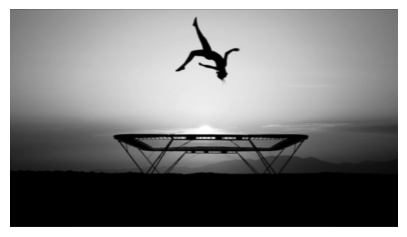

In [ ]:
Gshift=Fshift*H
G=np.fft.ifftshift(Gshift)
g=np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g,cmap='gray')
plt.axis('off')
plt.show()

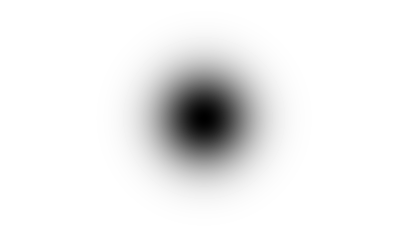

(-0.5, 1199.5, 674.5, -0.5)

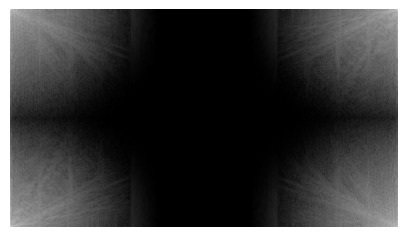

In [ ]:
#Gaussian:High pass Filter
HPF=1-H

plt.figure(figsize=(5,5))
plt.imshow(HPF,cmap='gray')
plt.axis('off')
plt.show()

F_LPF=np.fft.fft2(g)                  #Fourier transform of original image
Fshift_LPF=np.fft.fftshift(F_LPF)     #to centre the fourier transform of original image

#Displaying the fourier transform of LPF image
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F_LPF)),cmap='gray')
plt.axis('off')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
